In [26]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import numpy as np
import torch
from matplotlib import pyplot as plt

n_trials = 100000 # How many trials to average over
n_tests = 10 # How many examples to try
n=10 # Number of streams
d=4 # Dimension of input
eps=0 #1.529

def softmax(x):
    y = np.exp(x)
    return y/np.sum(y)


ModuleNotFoundError: No module named 'torch'

In [ ]:
# Original

for test in range(10):
    u = np.random.random((1,1,d)) # Input vector [a,b,c,d]
    input_spikes = 1.0*(np.random.random((n_trials,n,d))<u) # Get binary spikes based on input
    I = np.sum(input_spikes,axis=2,keepdims=True) # Get inhibition terms
    relu=np.maximum(0,1+(input_spikes-eps*I)/n) # Apply activation function step thingy
    exp = np.prod(relu,axis=1,keepdims=True) # Multiply streams
    approx = np.mean(exp,axis=0) # Estimate of softmax using this sampling method

    # exact = softmax(u) # Actual softmax
    exact = np.exp(u) # Actual exponential

    diff = exact - approx # Vector difference
    print("Error: ",int(100*np.sqrt(np.sum(diff**2)/np.sum(exact**2))),"%")


Error:  3 %
Error:  1 %
Error:  3 %
Error:  1 %
Error:  1 %
Error:  1 %
Error:  2 %
Error:  3 %
Error:  1 %
Error:  3 %


This scipt approximated $e^{-c}$ by using $e^{-c}\approx (1-c/N)^N$, which is the probability that $N$ Bernoulli($c/N$) trials all fail. This lets one construct a Bernoulli($e^{-c}$) r.v.

In [ ]:

print("Example: ")
print("c = 2, e^{-c} = 0.1353")
print("Approximation: ",np.mean(ExpBernoulli(2,10000,10000)))


Example: 
c = 2, e^{-c} = 0.1353
Approximation:  0.1341


In [ ]:
# N=1000 # Number of coins to flip on each trial
# K=100000 # Number of trials
# c=2

# C = np.linspace(0,10,10) # Inputs to test
# for c in C:
#     spikes = ExpBernoulli(c,N,K)
#     approx = np.mean(spikes)
#     # print(np.mean(no_spikes))
#     # print(np.exp(-c))
#     print(approx)
#     error = int(100*np.abs(approx*np.exp(c)-1))
#     print("Error: ",error,"%")# n_pop=100


1.0
Error:  0 %
0.32938
Error:  0 %
0.10736
Error:  0 %
0.03582
Error:  0 %
0.01165
Error:  0 %
0.00388
Error:  0 %
0.00127
Error:  0 %
0.00027
Error:  35 %
0.00018
Error:  30 %
8e-05
Error:  76 %


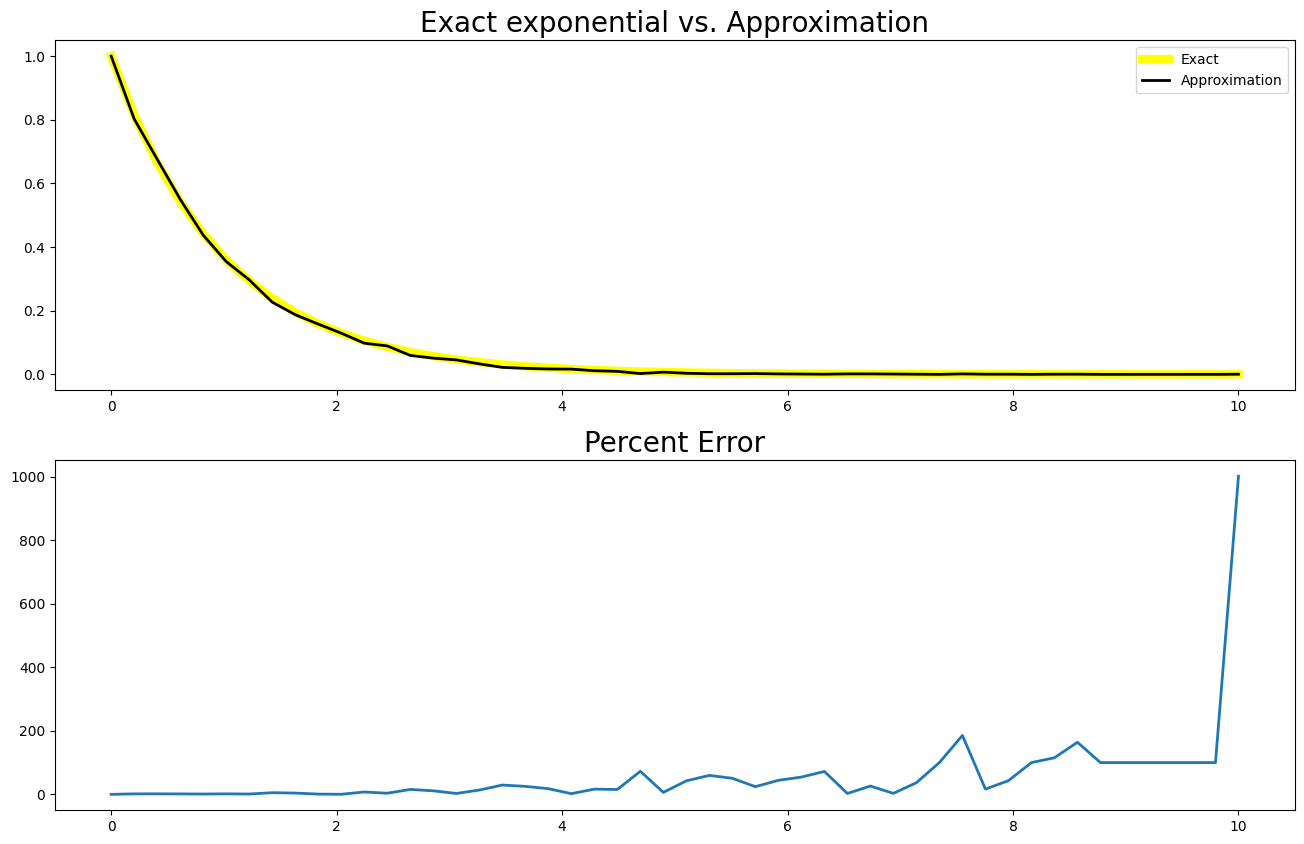

In [ ]:
%matplotlib inline
N=50 # Population size
K=2000 # Number of trials

exact_li=[]
approx_li=[]
error_li=[]

C = np.linspace(0,10,50) # Inputs to test

for c in C:
    # Compute approximate value
    spikes = ExpBernoulli(c,N,K)
    approx = np.mean(spikes)

    # Exact value
    exact = np.exp(-c)

    # Error
    error = 100*np.abs(approx/exact-1)

    # Save
    approx_li.append(approx)
    exact_li.append(exact)
    error_li.append(error)

    # print("Exact exponential: ",exact)
    # print("Approximation: ",approx)
    # print("Error: ",error,"%")

fig,ax=plt.subplots(2,figsize=(16,10))
ax[0].plot(C,exact_li,linewidth=6,color='yellow',label='Exact')
ax[0].plot(C,approx_li,linewidth=2,color='black',label='Approximation')
ax[0].legend()
ax[0].set_title('Exact exponential vs. Approximation',fontsize=20)
ax[1].plot(C,error_li,linewidth=2)
ax[1].set_title('Percent Error',fontsize=20)
plt.show()

In [72]:
def ExpBernoulliAlt(c,lam,size=None,method='poisson',N=1000): # returns with probability $e^{c-lam}$
    if size is None: 
        size = (1,)
    if type(size) is int:
        size = (size,)
    elif type(size) is not tuple:
        raise TypeError("size must be int or tuple")
    
    if method == 'poisson':
        M=np.random.poisson(lam=lam,size=size) # Get integers from poisson(lam).
    elif method == 'binomial': # N is number to flip
        M=np.random.binomial(N,lam/N,size=size)

    # if type(c) is float:
    spikes = np.random.random(size)<np.power(c/lam,M) # Spike if all K trials are successful
    return spikes



# c = 2
# lam=3
# print(np.exp(c-lam))
# print(np.mean(ExpBernoulliAlt(c,lam,10000)))
# print(np.mean(ExpBernoulliAlt(c,lam,size=10000,method='binomial',N=1000)))


$K\sim e^{-\lambda} \lambda^K/K!$

$\sum_K (e^{-\lambda}\lambda^K/K!)(c/\lambda)^K=e^{c-\lambda}$

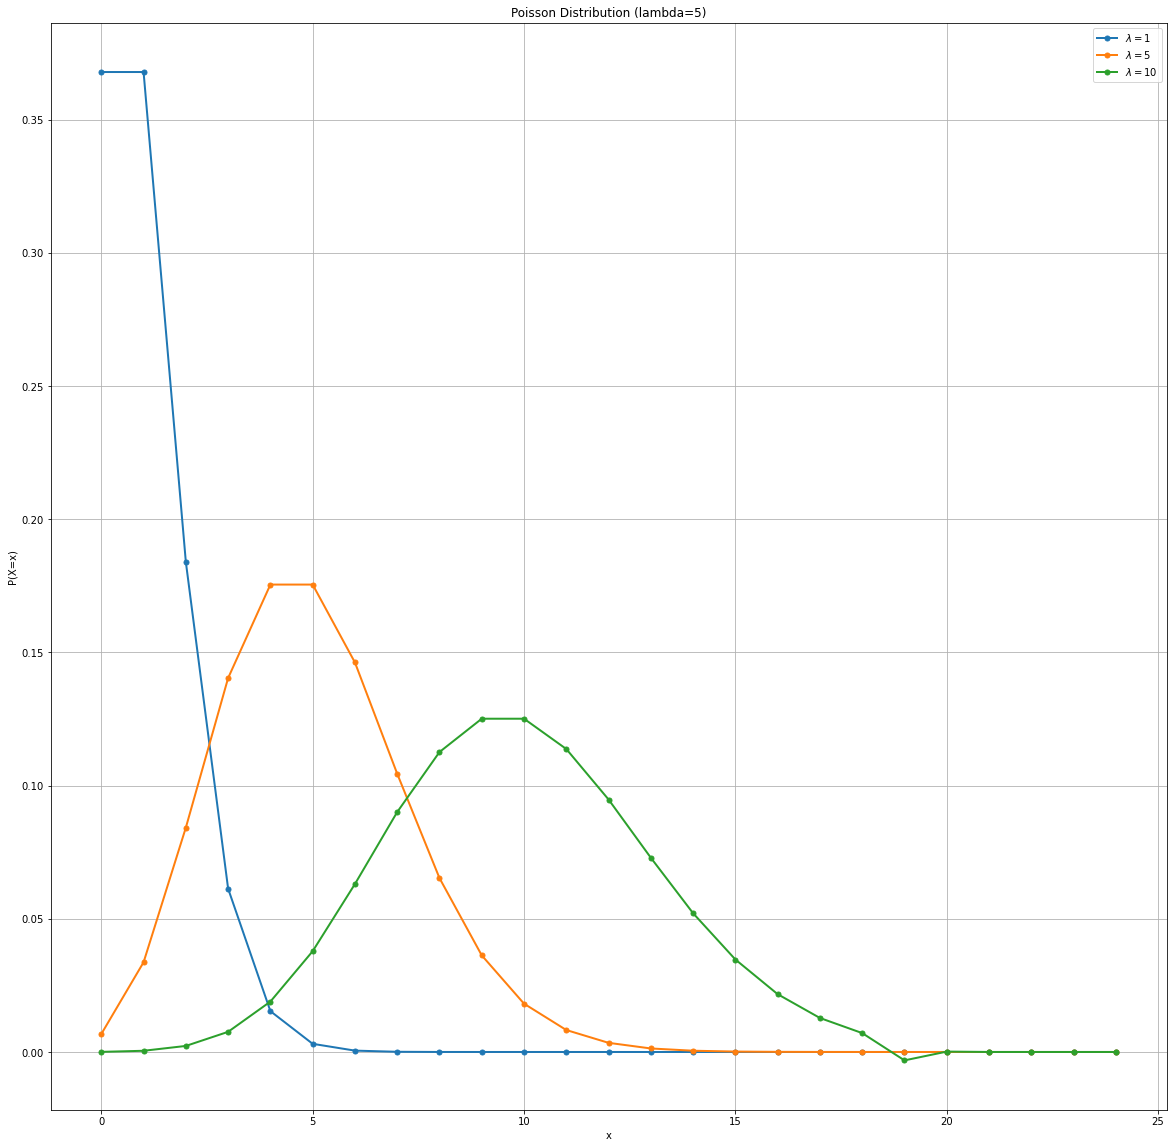

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Set the value of lambda
fig, ax = plt.subplots(figsize=(20,20))
for lam in [1,5,10]:
    
    # Generate the x values
    x = np.arange(0, 25,dtype='int')

    # Compute the Poisson distribution
    poisson_dist = np.exp(-lam) * np.power(lam, x) / factorial(x)
    ax.plot(x, poisson_dist,'-o', linewidth=2, markersize=5,label="$\lambda=$"+str(lam))
    ax.set_xlabel('x')
    ax.set_ylabel('P(X=x)')
    ax.set_title('Poisson Distribution (lambda=5)')
    ax.legend()
    ax.grid(True)

plt.show()


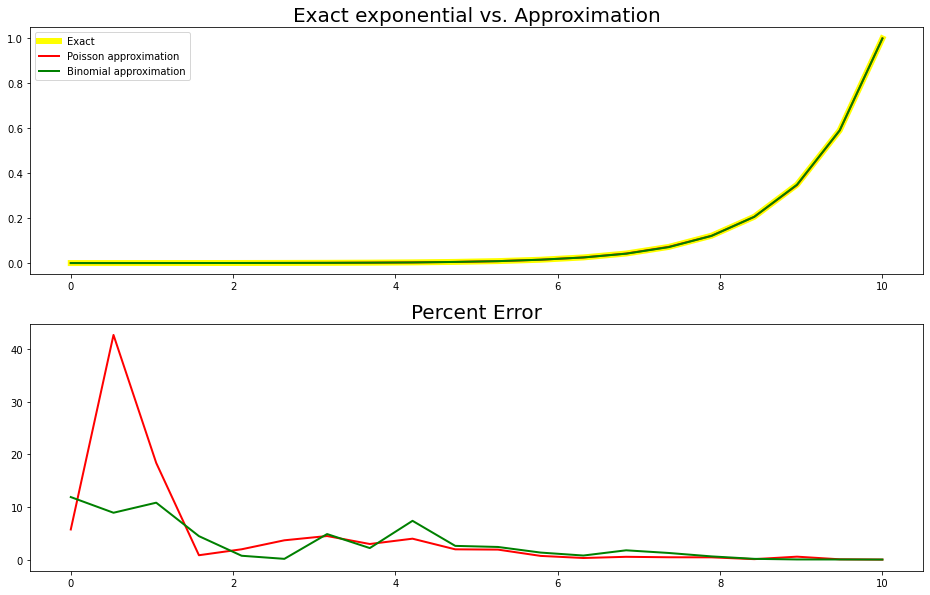

In [58]:

# Works well for single exponential
%matplotlib inline
lam=10
K=500000 # Number of trials
N=500 # Number of coins to flip for binomial version
methods = ['poisson','binomial']
exact_li=[]
approx_li = {method:[] for method in methods}
error_li = {method:[] for method in methods}

C = np.linspace(0,lam,20) # Inputs to test

for c in C:
    # Compute approximate value
    # poisson_spikes = ExpBernoulliAlt(c,lam,K,method='poisson')
    poisson_approx = np.mean(ExpBernoulliAlt(c,lam,K,method='poisson'))
    # spikes = ExpBernoulliAlt(c,lam,K,method='binomial')
    binomial_approx = np.mean(ExpBernoulliAlt(c,lam,K,method='binomial',N=N))

    # Exact value
    exact = np.exp(c-lam)

    # Error
    poisson_error = 100*np.abs(poisson_approx/exact-1)
    binomial_error = 100*np.abs(binomial_approx/exact-1)

    # Save
    approx_li['poisson'].append(poisson_approx)
    approx_li['binomial'].append(binomial_approx)
    exact_li.append(exact)
    error_li['poisson'].append(poisson_error)
    error_li['binomial'].append(binomial_error)

    # print("Exact exponential: ",exact)
    # print("Approximation: ",approx)
    # print("Error: ",error,"%")

fig,ax=plt.subplots(2,figsize=(16,10))
ax[0].plot(C,exact_li,linewidth=6,color='yellow',label='Exact')
ax[0].plot(C,approx_li['poisson'],linewidth=2,color='red',label='Poisson approximation')
ax[0].plot(C,approx_li['binomial'],linewidth=2,color='green',label='Binomial approximation')
ax[0].legend()
ax[0].set_title('Exact exponential vs. Approximation',fontsize=20)
ax[1].plot(C,error_li['poisson'],linewidth=2,color='red')
ax[1].plot(C,error_li['binomial'],linewidth=2,color='green')
ax[1].set_title('Percent Error',fontsize=20)
plt.show()



The basic idea is to draw a random K from Poisson(lam) and then do K coin flips, each with success
probability p=a/lam. If ALL of the flips are successes, we will call the whole trial a success.
Then the probability of success is e^{a-lam} or e^{a-a/p}=e^{a(1-1/p)}. We can also roll a dice,
with probabilities proportioal to the different possible values, a,b,c,... And then we call it
a success for that value if every roll is that values



In [65]:

def softmax(x):
    y = np.exp(x)
    return y/np.sum(y)  

# N=5000 # Population size
# K=10000 # Number of trials
# c = [1,2,3,5,0] # Inputs to softmax
# p = np.array(c+[N])
# p = p/np.sum(p)
# approx=[0]*len(c)
# idx = [i for i in range(len(p))]
# for t in range(K):
#     x = np.random.choice(idx,size=N,p=p)
#     y = [a for a in idx if not a in x]
#     for j in y:
#         approx[j]+=1

# approx = np.array(approx)
# approx = approx/np.sum(approx)

# print(approx)
# print(softmax(-np.array(c)))


Try to get actual softmax.

In [81]:
N=500 # Population size
K=10000 # Number of trials
c = [1,1,2,3,5] # Inputs to softmax
dt = 0.01
lam = max(c)

for _ in range(N):
    li = [0 for _ in c]
    for i,x in enumerate(c):
        spikes = ExpBernoulliAlt(x,lam,K)
        li[i] = spikes
    total_mean_spikes = np.sum([np.mean(z) for z in li])
    lam += dt*(total_mean_spikes-1) # How the fuck did copilot guess this line from "lam += dt*"?????!!!!!!!!!!
    # print(total_mean_spikes)
print(softmax(np.array(c)))
print([np.mean(z) for z in li])


1.2135
1.2189
1.2278
1.2137
1.2093
1.2065
1.2027999999999999
1.2044000000000001
1.2098
1.206
1.1935
1.1955
1.1978
1.1888999999999998
1.1841
1.1809
1.1818
1.1774
1.1877
1.1742
1.1686999999999999
1.1774
1.1733
1.1652
1.1649
1.1705
1.1574
1.1675
1.1604999999999999
1.1598
1.159
1.1583
1.1446
1.1539
1.1474
1.141
1.1489
1.1392
1.1391
1.1407
1.1316
1.1393
1.145
1.1369
1.1376
1.1334
1.1293
1.1244
1.1293
1.1238000000000001
1.1179999999999999
1.1209
1.1246
1.1188
1.1215000000000002
1.1139000000000001
1.116
1.12
1.1072
1.1031
1.108
1.1198
1.1071
1.1093
1.0963
1.097
1.1039999999999999
1.1038000000000001
1.0996000000000001
1.103
1.1002999999999998
1.0892
1.0847
1.0998999999999999
1.099
1.0949
1.0952000000000002
1.1021
1.0887
1.089
1.0901
1.084
1.0813
1.0827
1.0847
1.0884
1.0876000000000001
1.0728
1.0845
1.0793
1.0754
1.0715000000000001
1.0734
1.0669
1.0798
1.0781
1.0691
1.0818
1.0677
1.0678
1.0731
1.0644
1.0804
1.0737
1.0707
1.0737999999999999
1.0656
1.0617
1.0544
1.0703
1.0603
1.0637
1.05140000000

$$\omega$$